In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import zscore

In [78]:
df = pd.read_csv("tech_companies_salary.csv")
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,09-09-2018 11:52,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688,...,0,0,0,0,0,0,0,0,NaN,NaN


In [79]:
df.isnull().sum()

timestamp                      0
company                        5
level                        123
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          870
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22508
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [80]:
df = df.drop(["location", "timestamp", "company", "level", "title", "tag", "stockgrantvalue", "bonus", "otherdetails",
              "cityid", "dmaid", "rowNumber", 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College', 'Race', 'basesalary'], axis=1)
df.columns

Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
       'gender', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'Education'],
      dtype='object')

In [81]:
df['yearsofexperience'].fillna(df['yearsofexperience'].median(), inplace=True)
df['yearsatcompany'].fillna(df['yearsatcompany'].median(), inplace=True)
df['gender'].fillna('Unknown', inplace=True)
df = df.dropna()

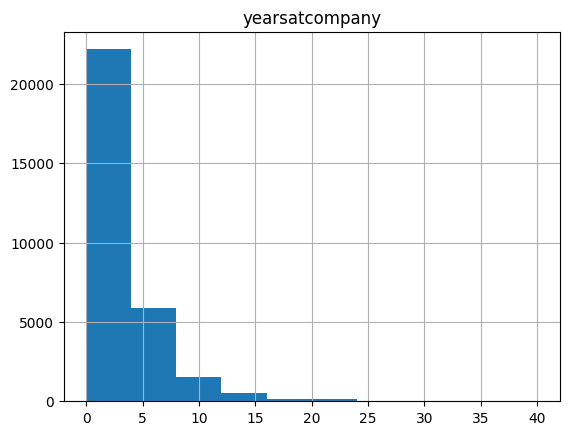

In [82]:
df.hist("yearsatcompany")
plt.show()

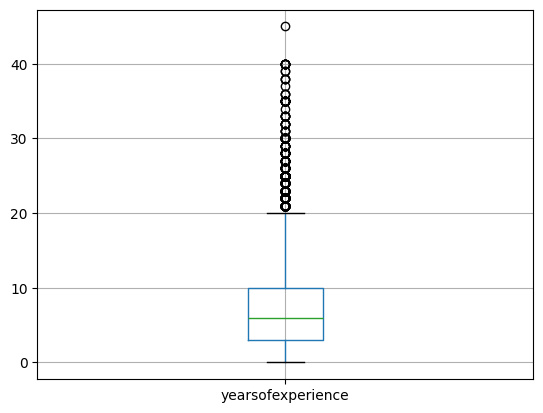

In [83]:
df.boxplot('yearsofexperience')
plt.show()

In [84]:
yoe_low_filter = 0
yoe_high_filter = 20
print(df["yearsofexperience"].median())

6.0


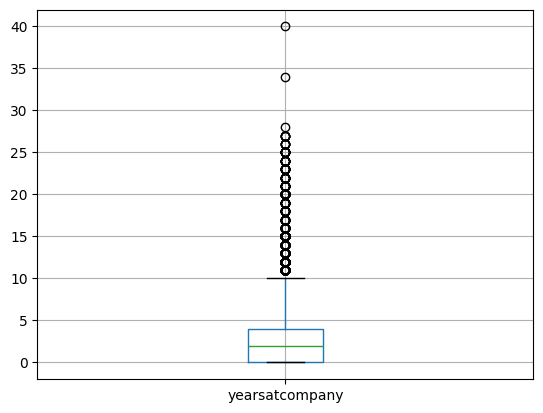

In [85]:
df.boxplot('yearsatcompany')
plt.show()

In [86]:
yac_low_filter = 0
yac_high_filter = 10
print(df["yearsatcompany"].median())

2.0


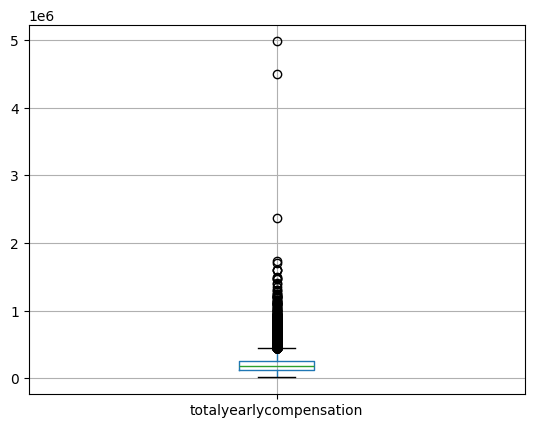

In [87]:
df.boxplot('totalyearlycompensation')
plt.show()

In [88]:
tyc_std = df['totalyearlycompensation'].std()
tyc_median = df['totalyearlycompensation'].median()
tyc_low_filter = 0
tyc_high_filter = tyc_median + (2*tyc_std)
print(tyc_high_filter)

447934.8016165945


In [89]:
df2 = df[(df["totalyearlycompensation"] <= tyc_high_filter)&(df["yearsatcompany"] <= yac_high_filter)&(df["yearsofexperience"] <= yoe_high_filter)]

In [90]:
df3 = pd.get_dummies(df2['gender'], drop_first=True, dtype=int)
df3 = df3.drop(df3[['Other', 'Unknown']], axis = 1)
df3

,Male
46,0
717,0
3427,1
5037,1
5392,1
...,...
61824,1
61826,1
61828,1
61830,0


In [91]:
df5 = df2.join(df3)
df5 = df5.drop(["gender"], axis=1)
df5['Education'] = df5['Education'].replace("Highschool", 1)
df5['Education'] = df5['Education'].replace("Some College", 2)
df5['Education'] = df5['Education'].replace("Bachelor's Degree", 3)
df5['Education'] = df5['Education'].replace("Master's Degree", 4)
df5['Education'] = df5['Education'].replace("PhD", 5)
df5

,totalyearlycompensation,yearsofexperience,yearsatcompany,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,Male
46,320000,4.0,1.0,0,0,0,0,0,5,0
717,239000,4.0,0.0,0,0,0,0,0,5,0
3427,125000,1.0,0.0,0,0,0,0,0,5,1
5037,170000,0.0,0.0,0,0,0,0,0,4,1
5392,332000,1.0,0.0,0,0,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...
61824,77000,0.0,0.0,1,0,0,0,0,3,1
61826,92000,2.0,2.0,1,0,0,0,0,3,1
61828,95000,3.0,3.0,0,1,0,0,0,3,1
61830,241000,9.0,0.0,1,0,0,0,0,3,0


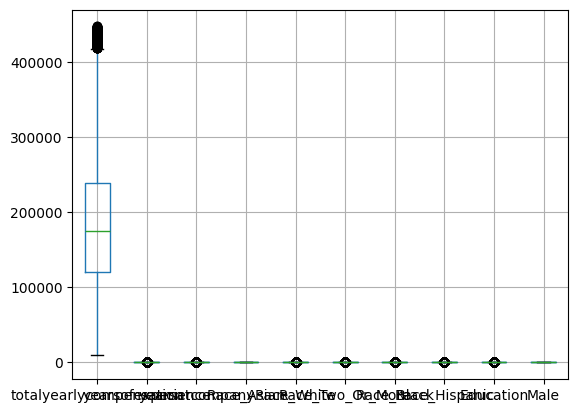

In [92]:
df5.boxplot()
plt.show()

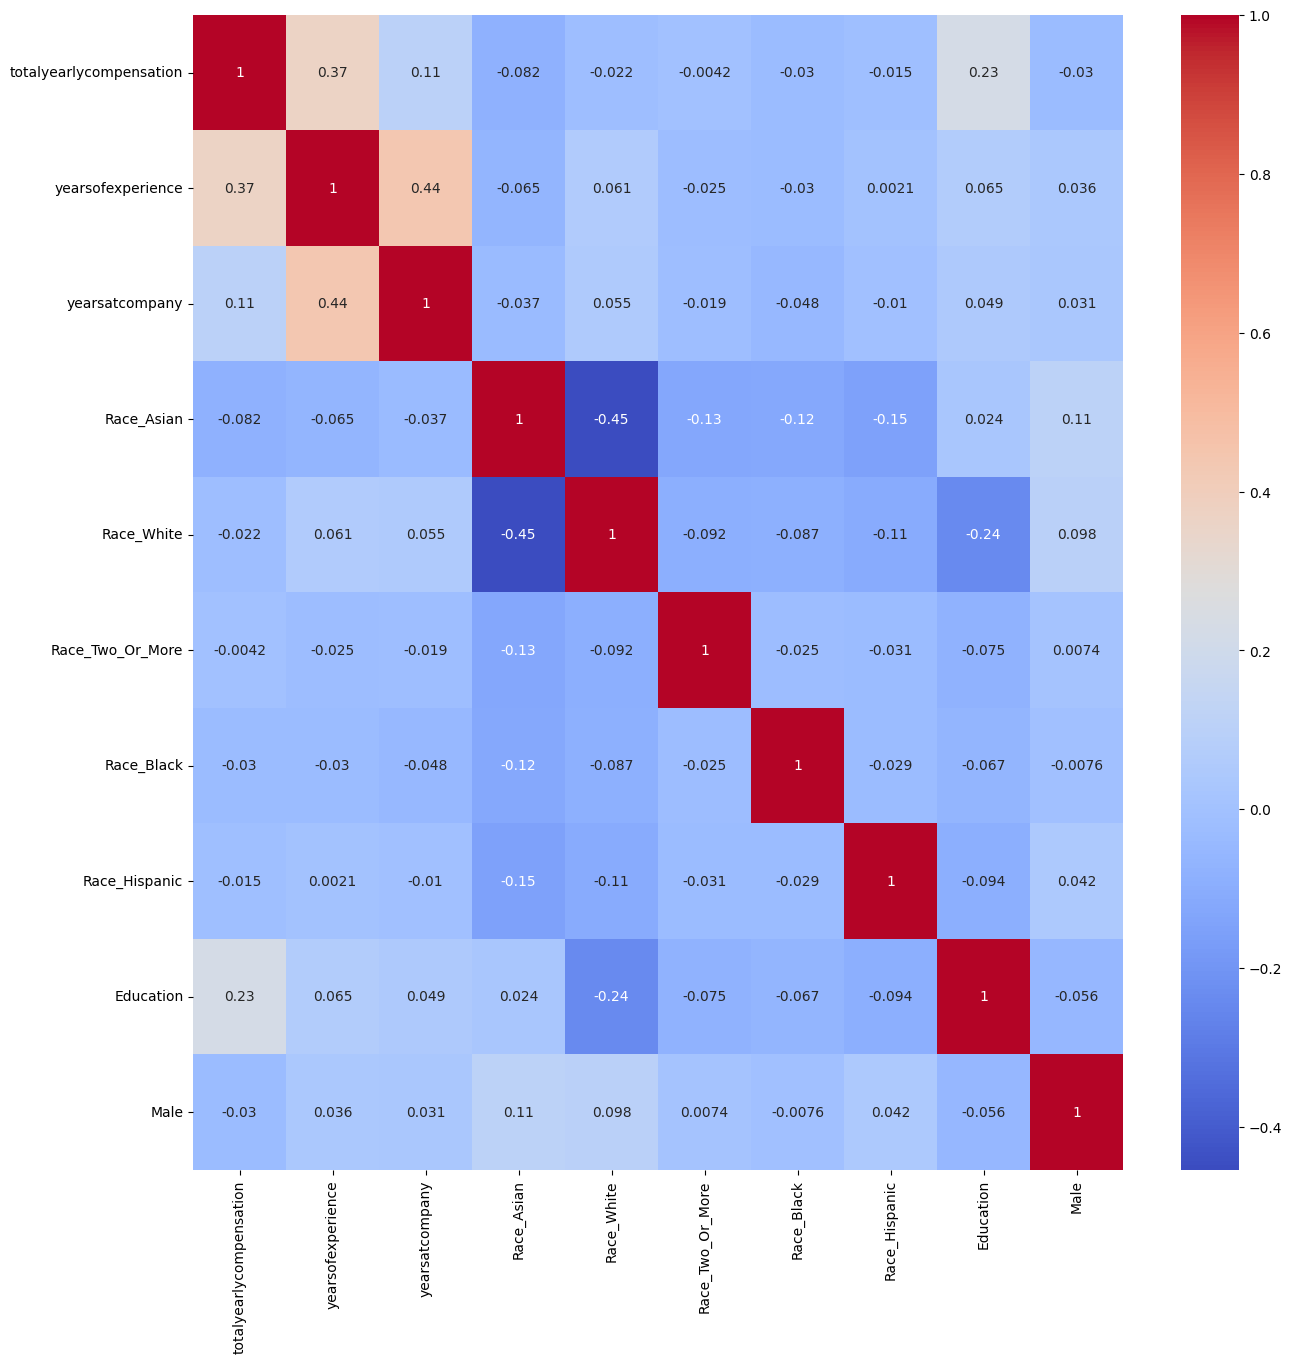

In [93]:
correlationMatrix = df5.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.show()

In [94]:
X = df5.drop(['yearsatcompany', 'totalyearlycompensation'], axis=1)
y = df5['totalyearlycompensation']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [97]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.187
Model:                                 OLS   Adj. R-squared:                  0.186
Method:                      Least Squares   F-statistic:                     634.9
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                             09:50:48   Log-Likelihood:            -2.8177e+05
No. Observations:                    22149   AIC:                         5.636e+05
Df Residuals:                        22140   BIC:                         5.636e+05
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

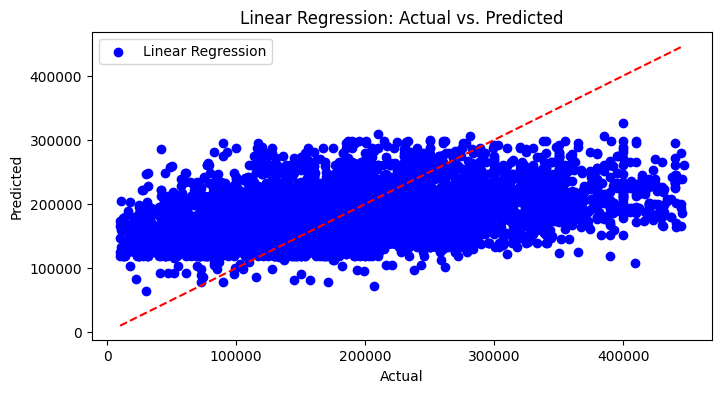

In [98]:
predict = model.predict(X_test)
mse = mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)
rmse = np.sqrt(mse)

plt.figure(figsize=(8, 4))
plt.scatter(y_test, predict, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

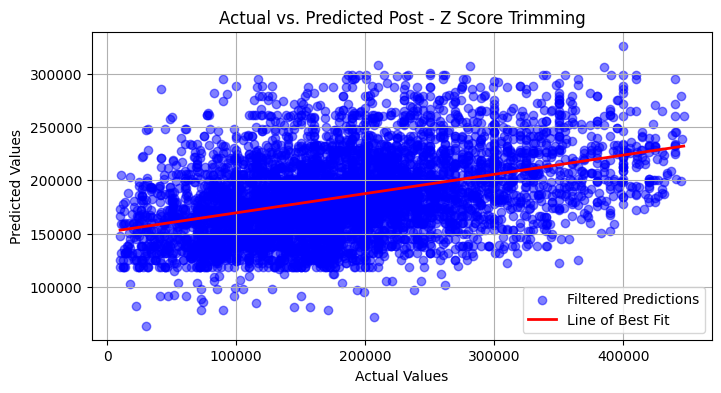

In [99]:
z_scores = zscore(y_test - predict)

mask = np.abs(z_scores) < 3
filtered_y_test = y_test[mask]
filtered_predict = predict[mask]

plt.figure(figsize=(8, 4))
plt.scatter(filtered_y_test, filtered_predict, color='blue', alpha=0.5, label='Filtered Predictions')

slope, intercept = np.polyfit(filtered_y_test, filtered_predict, 1)

regression_line_x = np.linspace(min(filtered_y_test), max(filtered_y_test), 100)

regression_line_y = intercept + slope * regression_line_x

plt.plot(regression_line_x, regression_line_y, color='red', linestyle='-', linewidth=2, label='Line of Best Fit')

plt.title('Actual vs. Predicted Post - Z Score Trimming')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.legend()
plt.grid(True)
plt.show()

In [110]:
# Create and fit a Ridge Regression model
ridge_model = Ridge(alpha=1000)  # You can adjust the alpha value
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculate mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE : {mse_ridge:.2f}")
print("Linear Regression MSE: {}".format(mse))

Ridge Regression MSE : 6714904303.42
Linear Regression MSE: 6717561385.7260475
